# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
units = 'imperial'
url = "http://api.openweathermap.org/data/2.5/weather?"    

lat = []
long = []
maxtemp = []
humidity = []
clouds = []
wind_speed = []
country = []
new_city = []
counter = 1

In [4]:
for city in cities:
    query_url = f'{url}appid={weather_api_key}&units={units}&q={city}'
    data = requests.get(query_url)
    data2 = data.json()
    if counter == 1:
        print('Beginning Data Retrieval:\n---------------------------')
    try: 
        new_city.append(data2['name'])
        lat.append(data2['coord']['lat'])
        long.append(data2['coord']['lon'])
        maxtemp.append(data2['main']['temp_max'])
        humidity.append(data2['main']['humidity'])
        clouds.append(data2['clouds']['all'])
        wind_speed.append(data2['wind']['speed'])
        country.append(data2['sys']['country'])
        current_city = data2['name']
        print(f'Processing Record  {counter} of Set 1 | {current_city}')
        counter += 1
    except:
        pass
 

Beginning Data Retrieval:
---------------------------
Beginning Data Retrieval:
---------------------------
Processing Record  1 of Set 1 | Arraial do Cabo
Processing Record  2 of Set 1 | Griffith
Processing Record  3 of Set 1 | Kumul
Processing Record  4 of Set 1 | Hobart
Processing Record  5 of Set 1 | Lebu
Processing Record  6 of Set 1 | Tuktoyaktuk
Processing Record  7 of Set 1 | Rāvar
Processing Record  8 of Set 1 | Rikitea
Processing Record  9 of Set 1 | Kapaa
Processing Record  10 of Set 1 | Klaksvík
Processing Record  11 of Set 1 | Punta Arenas
Processing Record  12 of Set 1 | Belmonte
Processing Record  13 of Set 1 | Saint Paul Harbor
Processing Record  14 of Set 1 | Gīdolē
Processing Record  15 of Set 1 | Jamestown
Processing Record  16 of Set 1 | Mataura
Processing Record  17 of Set 1 | Prainha
Processing Record  18 of Set 1 | Cape Town
Processing Record  19 of Set 1 | Lompoc
Processing Record  20 of Set 1 | Port Elizabeth
Processing Record  21 of Set 1 | Ayna
Processing Rec

Processing Record  189 of Set 1 | Wanning
Processing Record  190 of Set 1 | Pinhão
Processing Record  191 of Set 1 | Port Hardy
Processing Record  192 of Set 1 | Vao
Processing Record  193 of Set 1 | Vila Velha
Processing Record  194 of Set 1 | Carnarvon
Processing Record  195 of Set 1 | Mareeba
Processing Record  196 of Set 1 | Bulgan
Processing Record  197 of Set 1 | Skjervøy
Processing Record  198 of Set 1 | Marzuq
Processing Record  199 of Set 1 | Bonavista
Processing Record  200 of Set 1 | Hualmay
Processing Record  201 of Set 1 | Bethel
Processing Record  202 of Set 1 | Chebarkul'
Processing Record  203 of Set 1 | Lüderitz
Processing Record  204 of Set 1 | Impfondo
Processing Record  205 of Set 1 | George Town
Processing Record  206 of Set 1 | Labuhan
Processing Record  207 of Set 1 | Aklavik
Processing Record  208 of Set 1 | Bang Saphan
Processing Record  209 of Set 1 | Provideniya
Processing Record  210 of Set 1 | Paita
Processing Record  211 of Set 1 | Nebbi
Processing Record 

Processing Record  379 of Set 1 | Byron Bay
Processing Record  380 of Set 1 | Hua Hin
Processing Record  381 of Set 1 | Ixtapa
Processing Record  382 of Set 1 | Newport
Processing Record  383 of Set 1 | Cascais
Processing Record  384 of Set 1 | Turbat
Processing Record  385 of Set 1 | Morondava
Processing Record  386 of Set 1 | Narok
Processing Record  387 of Set 1 | Badvel
Processing Record  388 of Set 1 | Limbang
Processing Record  389 of Set 1 | Tual
Processing Record  390 of Set 1 | Grindavik
Processing Record  391 of Set 1 | Fougamou
Processing Record  392 of Set 1 | Kattivākkam
Processing Record  393 of Set 1 | Requena
Processing Record  394 of Set 1 | Karakol
Processing Record  395 of Set 1 | Tiarei
Processing Record  396 of Set 1 | Mocuba
Processing Record  397 of Set 1 | Isangel
Processing Record  398 of Set 1 | Beroroha
Processing Record  399 of Set 1 | Bayangol
Processing Record  400 of Set 1 | Zamānia
Processing Record  401 of Set 1 | São João da Barra
Processing Record  40

In [5]:
weather_dict = {
    'City': new_city,
    'Latitude': lat,
    'Longitude': long,
    'Max Temp': maxtemp,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind Speed': wind_speed,
    'Country': country
}
weather_data = pd.DataFrame(weather_dict)
weather_data
weather_data.to_csv(r'output.csv', index = False)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Arraial do Cabo,-22.9661,-42.0278,72.10,84,100,7.67,BR
1,Griffith,41.5284,-87.4237,10.40,79,90,8.05,US
2,Kumul,42.8000,93.4500,33.22,72,99,5.53,CN
3,Hobart,-42.8794,147.3294,66.00,63,75,17.27,AU
4,Lebu,-37.6167,-73.6500,57.81,93,24,1.86,CL
...,...,...,...,...,...,...,...,...
553,Bella Vista,36.4295,-94.2316,30.99,93,90,19.57,US
554,Caconda,-13.7333,15.0667,62.49,65,100,5.21,AO
555,Ketchikan,55.3422,-131.6461,37.40,86,90,9.22,US
556,Hoi An,15.8794,108.3350,71.60,94,75,3.44,VN


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
new = weather_data.loc[weather_data['Humidity'] > 100]
new

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country


In [8]:
# Splitting into Northern/Southern Hemi

northern_hemi = weather_data.loc[weather_data['Latitude'] >= 0]
northern_hemi


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country
1,Griffith,41.5284,-87.4237,10.40,79,90,8.05,US
2,Kumul,42.8000,93.4500,33.22,72,99,5.53,CN
5,Tuktoyaktuk,69.4541,-133.0374,-16.60,76,90,19.57,CA
6,Rāvar,31.2656,56.8055,49.60,40,0,2.59,IR
8,Kapaa,22.0752,-159.3190,73.40,53,75,6.91,US
...,...,...,...,...,...,...,...,...
552,Juneau,58.3019,-134.4197,19.40,53,40,9.22,US
553,Bella Vista,36.4295,-94.2316,30.99,93,90,19.57,US
555,Ketchikan,55.3422,-131.6461,37.40,86,90,9.22,US
556,Hoi An,15.8794,108.3350,71.60,94,75,3.44,VN


In [9]:
southern_hemi = weather_data.loc[weather_data['Latitude'] < 0]
southern_hemi

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Arraial do Cabo,-22.9661,-42.0278,72.10,84,100,7.67,BR
3,Hobart,-42.8794,147.3294,66.00,63,75,17.27,AU
4,Lebu,-37.6167,-73.6500,57.81,93,24,1.86,CL
7,Rikitea,-23.1203,-134.9692,78.78,69,73,10.56,PF
10,Punta Arenas,-53.1500,-70.9167,51.80,66,0,17.27,CL
...,...,...,...,...,...,...,...,...
544,Kasempa,-13.4584,25.8338,64.53,97,100,4.47,ZM
545,Palu,-0.8917,119.8707,89.11,50,100,1.52,ID
549,Vanimo,-2.6741,141.3028,80.37,83,100,3.65,PG
551,Karratha,-20.7377,116.8463,82.89,56,7,11.07,AU


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

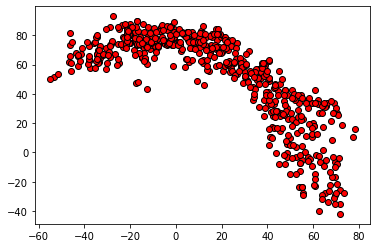

In [10]:
plt.scatter(weather_data['Latitude'], weather_data['Max Temp'], marker="o", facecolors="red", edgecolors="black")
plt.savefig('latitude_vs_temp')

## Latitude vs. Humidity Plot

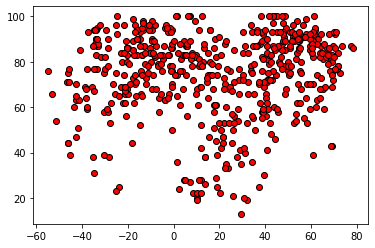

In [22]:
plt.scatter(weather_data['Latitude'], weather_data['Humidity'], marker="o", facecolors="red", edgecolors="black")
plt.savefig('latitude_vs_humidity')

## Latitude vs. Cloudiness Plot

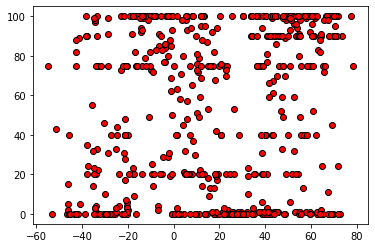

In [23]:
plt.scatter(weather_data['Latitude'], weather_data['Cloudiness'], marker="o", facecolors="red", edgecolors="black")
plt.savefig('latitude_vs_cloudiness')

## Latitude vs. Wind Speed Plot

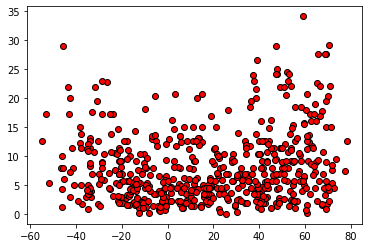

In [24]:
plt.scatter(weather_data['Latitude'], weather_data['Wind Speed'], marker="o", facecolors="red", edgecolors="black")
plt.savefig('latitude_vs_windspeed')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.7252773021619201


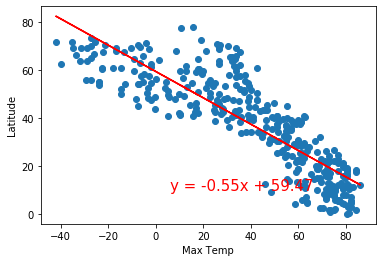

In [41]:

x_values = northern_hemi['Max Temp'].astype('float')
y_values = northern_hemi['Latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Max Temp')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")
plt.savefig('northern_temp_latitude')
# Show plot
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.21196008366293212


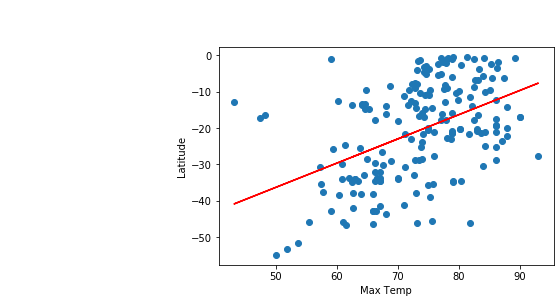

In [42]:
x_values = southern_hemi['Max Temp'].astype('float')
y_values = southern_hemi['Latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Max Temp')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")
plt.savefig('southern_temp_latitude')
# Show plot
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.08476810826864346


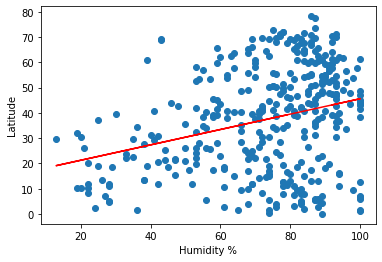

In [43]:
x_values = northern_hemi['Humidity'].astype('float')
y_values = northern_hemi['Latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Humidity %')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")
plt.savefig('northern_humidity_latitude')
# Show plot
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.09047082070778076


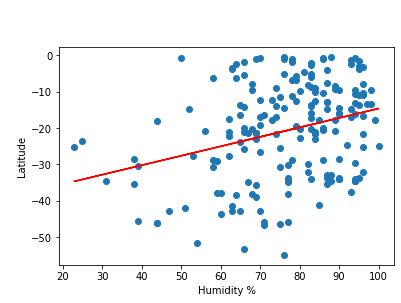

In [44]:
x_values = southern_hemi['Humidity'].astype('float')
y_values = southern_hemi['Latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Humidity %')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")
plt.savefig('southern_humidity_latitude')
# Show plot
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.04405195893161123


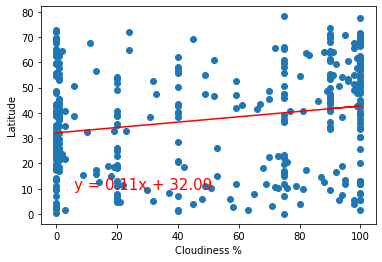

In [45]:
x_values = northern_hemi['Cloudiness'].astype('float')
y_values = northern_hemi['Latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Cloudiness %')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")
plt.savefig('northern_cloudiness_latitude')
# Show plot
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.1477015108486361


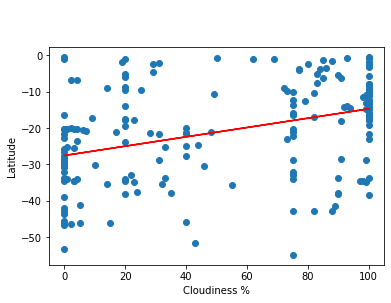

In [46]:
x_values = southern_hemi['Cloudiness'].astype('float')
y_values = southern_hemi['Latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Cloudiness %')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")
plt.savefig('southern_humidity_latitude')
# Show plot
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.06677938113122112


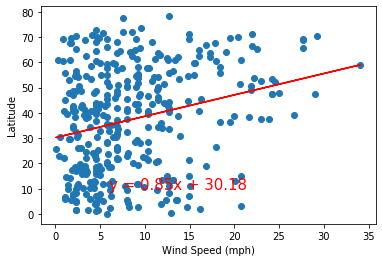

In [47]:
x_values = northern_hemi['Wind Speed'].astype('float')
y_values = northern_hemi['Latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")
plt.savefig('northern_windspeed_latitude')
# Show plot
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.11162746974768076


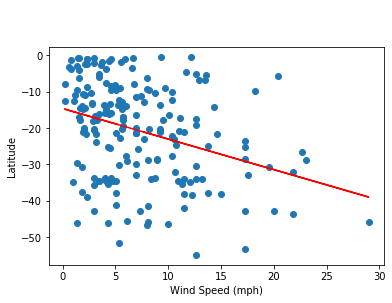

In [48]:
x_values = southern_hemi['Wind Speed'].astype('float')
y_values = southern_hemi['Latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")
plt.savefig('southern_windspeed_latitude')
# Show plot
plt.show()
